In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
plt.style.use('fivethirtyeight')

In [23]:
sys.path.append('heuristics.py')
import heuristics as h

In [24]:
states = np.load('Data/States.npy')
diffs = np.load('Data/diffs.npy')

## Informedness

In [25]:
h1_game_costs = []
h2_game_costs = []
h3_game_costs = []
for state in states:
    h1_game_costs.append(h.h1(state))
    h2_game_costs.append(h.h2(state))
    h3_game_costs.append(h.h3(state))

In [26]:
informed = pd.DataFrame(list(zip(h1_game_costs, h2_game_costs, h3_game_costs)), 
                        columns = ['h1', 'h2', 'h3'])
informed['Difficulty'] = [diffs[i % len(diffs)] for i in range(len(states))]

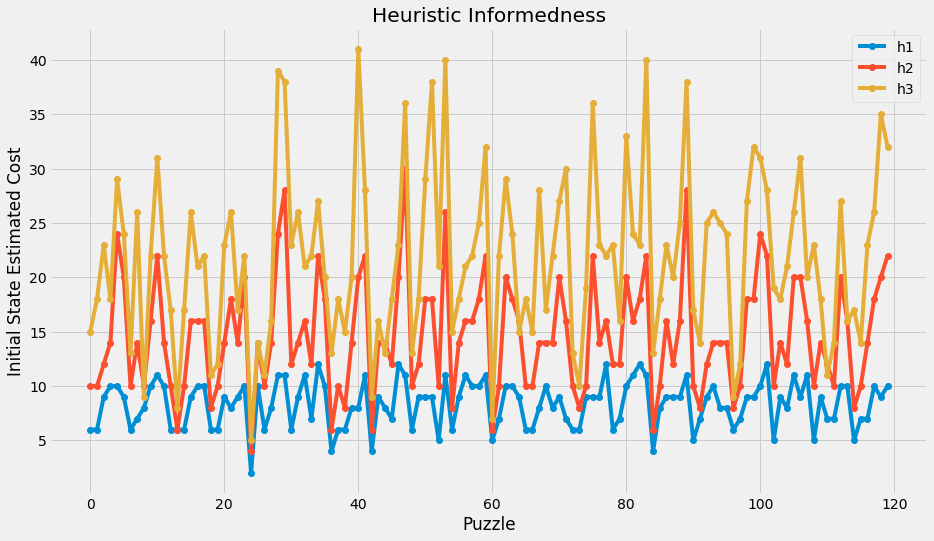

In [31]:
plt.figure(figsize=(14, 8))
plt.title('Heuristic Informedness')
plt.xlabel('Puzzle')
plt.ylabel('Initial State Estimated Cost')
p1 = plt.plot(informed.index, informed.h1, '-o', label='h1')
p2 = plt.plot(informed.index, informed.h2, '-o', label='h2')
p3 = plt.plot(informed.index, informed.h3, '-o', label='h3')
plt.legend()
plt.show()

## AStar vs BestFirst

### Scatter plot - Search Length vs Solution Path Length

In [86]:
aS = []
bf = []
for idx in range(len(states)):
    as_df = pd.read_pickle('Data/Stats/h1/state_%d/as.pkl' % idx)
    bf_df = pd.read_pickle('Data/Stats/h1/state_%d/bf.pkl' % idx)
    aS.append([as_df.Searches[0], as_df.SolutionLength[0]-1])
    bf.append([bf_df.Searches[0], bf_df.SolutionLength[0]-1])

In [87]:
aS_df = pd.DataFrame(aS, columns = ['Searches', 'SolutionLength'])
bf_df = pd.DataFrame(bf, columns = ['Searches', 'SolutionLength'])

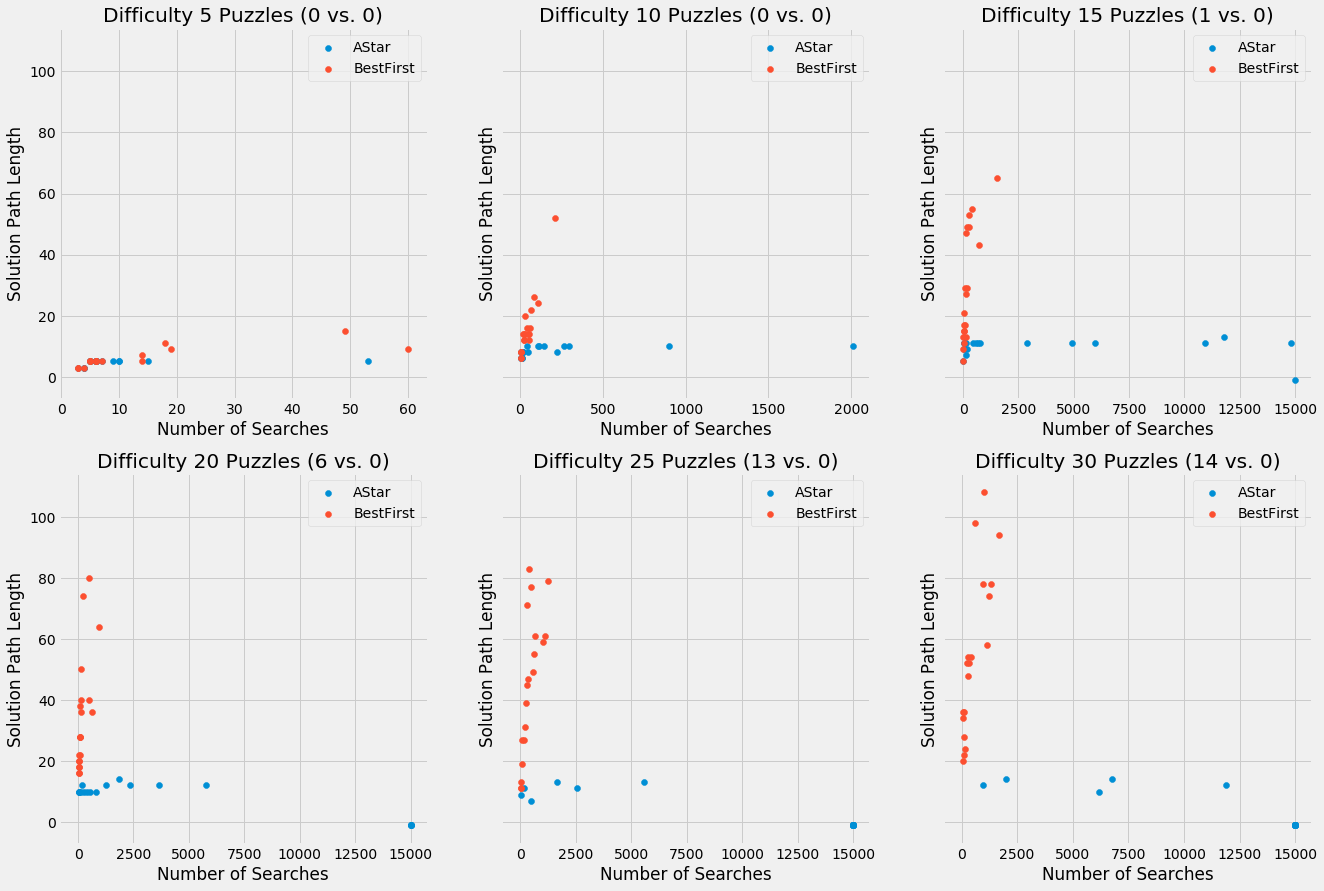

In [88]:
fig, ax = plt.subplots(nrows=2, ncols=3, sharey=True, figsize=(20, 14))
ctr=0
for i in range(2):
    for j in range(3):
        idc = [idx for idx in range(len(states)-2) if idx % 6 == ctr]
        temp_as = aS_df.iloc[idc, :]
        temp_bf = bf_df.iloc[idc, :]
        ax[i , j].scatter(temp_as.Searches, temp_as.SolutionLength, label='AStar')
        ax[i , j].scatter(temp_bf.Searches, temp_bf.SolutionLength, label='BestFirst')
        ax[i, j].set_xlabel('Number of Searches')
        ax[i, j].set_ylabel('Solution Path Length')
        incomplete_as = temp_as[temp_as.Searches == 15000].shape[0]
        incomplete_bf = temp_bf[temp_bf.Searches == 15000].shape[0]
        ax[i, j].set_title('Difficulty %d Puzzles (%d vs. %d)' 
                           % (diffs[ctr], incomplete_as, incomplete_bf))
        ax[i, j].legend()
        ctr+=1

In [89]:
aS = []
bf = []
for idx in range(len(states)):
    as_df = pd.read_pickle('Data/Stats/h2/state_%d/as.pkl' % idx)
    bf_df = pd.read_pickle('Data/Stats/h2/state_%d/bf.pkl' % idx)
    aS.append([as_df.Searches[0], as_df.SolutionLength[0]-1])
    bf.append([bf_df.Searches[0], bf_df.SolutionLength[0]-1])

In [90]:
aS_df = pd.DataFrame(aS, columns = ['Searches', 'SolutionLength'])
bf_df = pd.DataFrame(bf, columns = ['Searches', 'SolutionLength'])

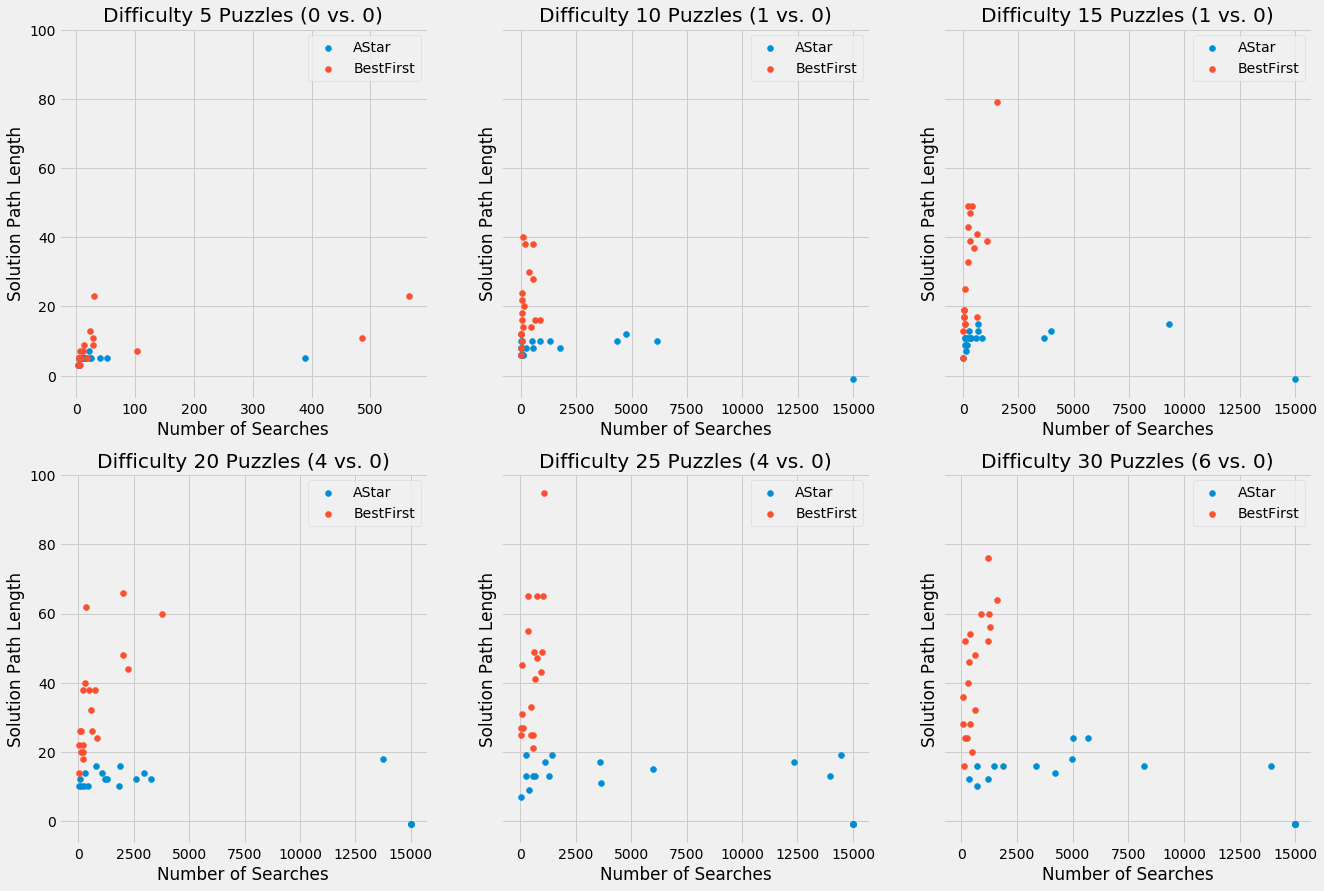

In [91]:
fig, ax = plt.subplots(nrows=2, ncols=3, sharey=True, figsize=(20, 14))
ctr=0
for i in range(2):
    for j in range(3):
        idc = [idx for idx in range(len(states)-2) if idx % 6 == ctr]
        temp_as = aS_df.iloc[idc, :]
        temp_bf = bf_df.iloc[idc, :]
        ax[i , j].scatter(temp_as.Searches, temp_as.SolutionLength, label='AStar')
        ax[i , j].scatter(temp_bf.Searches, temp_bf.SolutionLength, label='BestFirst')
        ax[i, j].set_xlabel('Number of Searches')
        ax[i, j].set_ylabel('Solution Path Length')
        incomplete_as = temp_as[temp_as.Searches == 15000].shape[0]
        incomplete_bf = temp_bf[temp_bf.Searches == 15000].shape[0]
        ax[i, j].set_title('Difficulty %d Puzzles (%d vs. %d)' 
                           % (diffs[ctr], incomplete_as, incomplete_bf))
        ax[i, j].legend()
        ctr+=1

In [92]:
aS = []
bf = []
for idx in range(len(states)-2):
    as_df = pd.read_pickle('Data/Stats/h3/state_%d/as.pkl' % idx)
    bf_df = pd.read_pickle('Data/Stats/h3/state_%d/bf.pkl' % idx)
    aS.append([as_df.Searches[0], as_df.SolutionLength[0]-1])
    bf.append([bf_df.Searches[0], bf_df.SolutionLength[0]-1])

In [93]:
aS_df = pd.DataFrame(aS, columns = ['Searches', 'SolutionLength'])
bf_df = pd.DataFrame(bf, columns = ['Searches', 'SolutionLength'])

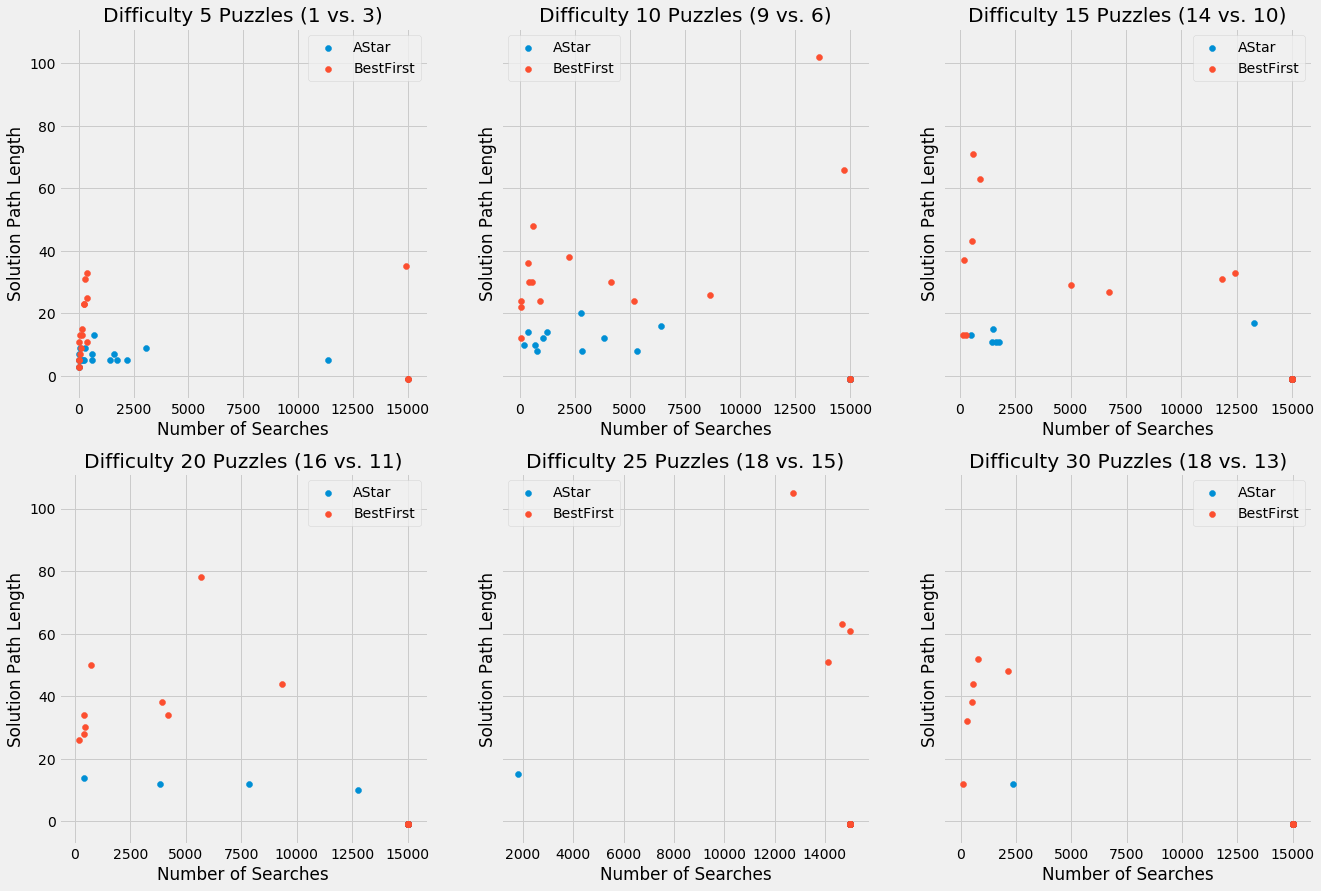

In [94]:
fig, ax = plt.subplots(nrows=2, ncols=3, sharey=True, figsize=(20, 14))
ctr=0
for i in range(2):
    for j in range(3):
        idc = [idx for idx in range(len(states)-2) if idx % 6 == ctr]
        temp_as = aS_df.iloc[idc, :]
        temp_bf = bf_df.iloc[idc, :]
        ax[i , j].scatter(temp_as.Searches, temp_as.SolutionLength, label='AStar')
        ax[i , j].scatter(temp_bf.Searches, temp_bf.SolutionLength, label='BestFirst')
        ax[i, j].set_xlabel('Number of Searches')
        ax[i, j].set_ylabel('Solution Path Length')
        incomplete_as = temp_as[temp_as.Searches == 15000].shape[0]
        incomplete_bf = temp_bf[temp_bf.Searches == 15000].shape[0]
        ax[i, j].set_title('Difficulty %d Puzzles (%d vs. %d)' 
                           % (diffs[ctr], incomplete_as, incomplete_bf))
        ax[i, j].legend()
        ctr+=1